First Logistic Regression Model for Master's Thesis:
Objective: To detect present bias using all data.

In [32]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# data: read the data
train = pd.read_csv('Present Bias Conditions DF.csv')
"""
train = train[[
       'Image Familiarity Numerical',
       'Online Security Importance', 'Quick Log In Importance',
       'Usability Importance', 'Convenience Importance', 'Log In Satisfaction',
        'MFA Opt In Participation',
       'MFA Example Use Numerical']]
       """
train

,Age Group,Gender,Education,Ethnicity,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
0,3,0,5,4,4,2,10,9,10,9,8,2,1
1,2,0,5,5,6,2,7,10,9,7,8,1,1
2,2,1,3,5,4,2,6,8,8,8,7,1,1
3,2,2,3,1,5,2,10,10,10,10,10,2,0
4,1,2,5,5,5,2,10,10,10,10,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,5,5,3,2,10,10,10,10,6,3,0
182,1,2,3,5,3,2,8,10,7,10,7,2,1
183,1,0,4,5,6,2,10,8,8,8,7,2,1
184,4,2,4,5,6,2,10,6,6,6,10,3,0


In [34]:
train.head()

,Age Group,Gender,Education,Ethnicity,MFA Familiarity Count,Security Beliefs,Security Importance,Quick Log In Importance,Log In Usability Importance,Log In Convenience Importance,Log In Satisfaction,MFA Opt In Frequency,Present Bias
0,3,0,5,4,4,2,10,9,10,9,8,2,1
1,2,0,5,5,6,2,7,10,9,7,8,1,1
2,2,1,3,5,4,2,6,8,8,8,7,1,1
3,2,2,3,1,5,2,10,10,10,10,10,2,0
4,1,2,5,5,5,2,10,10,10,10,10,2,0


In [35]:
# exploratory data analysis
#sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Present Bias', ylabel='count'>

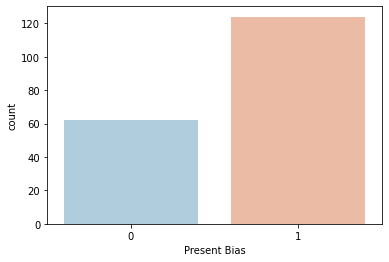

In [37]:
sns.countplot(x='Present Bias', data= train, palette= 'RdBu_r')

In [38]:
"""X = [['Image Familiarity Numerical',
       'Online Security Importance', 'Quick Log In Importance',
       'Usability Importance', 'Convenience Importance', 'Log In Satisfaction',
       'MFA Example Use Numerical']]
       """

"X = [['Image Familiarity Numerical',\n       'Online Security Importance', 'Quick Log In Importance',\n       'Usability Importance', 'Convenience Importance', 'Log In Satisfaction',\n       'MFA Example Use Numerical']]\n       "

# Building a Logistic Regression model

In [39]:
# split the train, test data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [40]:
# scale X_train
X_train = train.drop('Present Bias',axis=1)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [41]:
scaler.mean_

array([1.67741935, 0.70967742, 3.91397849, 2.72580645, 4.59677419,
       1.91397849, 9.3655914 , 8.80645161, 8.83333333, 8.89247312,
       8.27956989, 1.87634409])

In [42]:
scaler.scale_

array([0.93511302, 0.95129391, 0.93505119, 1.85642756, 1.30910391,
       0.3487586 , 1.14332985, 1.5468182 , 1.38702384, 1.4402984 ,
       1.51951882, 0.81040251])

In [43]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 1.4143538 , -0.74601278,  1.16145674, ...,  0.07465598,
        -0.1839858 ,  0.1525858 ],
       [ 0.34496434, -0.74601278,  1.16145674, ..., -1.31394517,
        -0.1839858 , -1.08136892],
       [ 0.34496434,  0.30518705, -0.97746359, ..., -0.6196446 ,
        -0.84208887, -1.08136892],
       ...,
       [-0.72442512, -0.74601278,  0.09199657, ..., -0.6196446 ,
        -0.84208887,  0.1525858 ],
       [ 2.48374326,  1.35638688,  0.09199657, ..., -2.00824574,
         1.13222033,  1.38654052],
       [ 0.34496434, -0.74601278,  0.09199657, ..., -2.00824574,
         1.13222033, -1.08136892]])

In [50]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled,train['Present Bias'],test_size=0.30,random_state=101)


In [51]:
# training and predicting
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [53]:
predictions = logmodel.predict(X_test)

In [54]:
# Evaluation
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.95      0.97      0.96        37

    accuracy                           0.95        56
   macro avg       0.95      0.93      0.94        56
weighted avg       0.95      0.95      0.95        56

